In [61]:
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.core.display import Image
import os, graphviz

In [62]:
url = os.getcwd().replace('\\','/')+'/'+'data/mushroom.txt'
with open(url) as a:
    data = np.array([x.split(',') for x in a.read().split('\n')])
le = preprocessing.LabelEncoder()
column = data[:,0]
set_col = list(set(column))
le.fit(column)
y = le.transform(column)
y_label = dict(zip(set_col, y))
X = np.array([])
for n in range(1,data.shape[1]):
    col = data[:,n]
    set_col = set(col)
    matrix = np.eye(len(set(col)))
    X_1 = np.array([matrix[list(set_col).index(i)] for i in col])
    if X.shape == (0,):
        X = X_1
    else:
        X =np.hstack((X,X_1))  
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [63]:
y_label

{'e': 1, 'p': 0}

In [64]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 1) #or min_sample_leaf. it restricts the minimum number of sample in leaf node
tree.fit(X_train, y_train)
print('Train data Accuracy: {}'.format(tree.score(X_train,y_train)))
print('Test data Accuracy: {}'.format(tree.score(X_test, y_test)))

Train data Accuracy: 0.994255703266043
Test data Accuracy: 0.9916297390448056


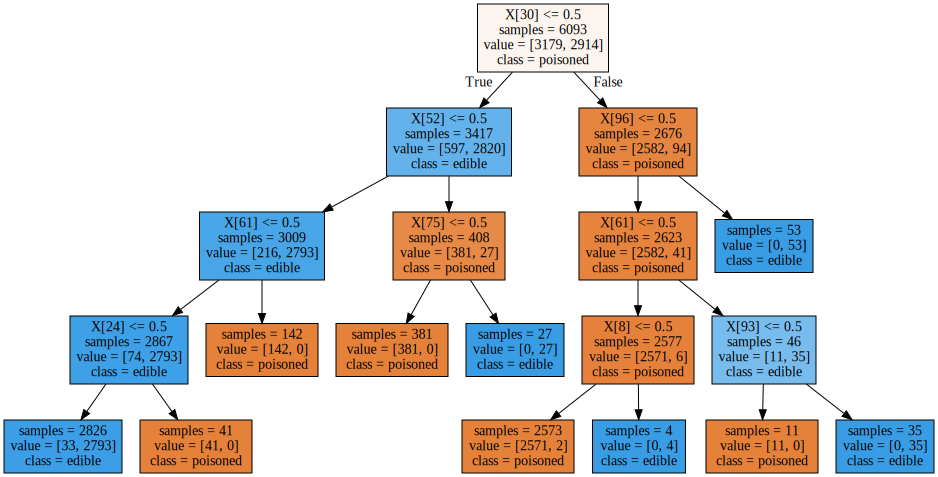

In [65]:
export_graphviz(tree, out_file = 'tree.dot', class_names = ['poisoned', 'edible'], 
                impurity = False, filled=True) #filled makes each nodes into colored nodes

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'
with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [66]:
print('feature importance:\n{}'.format(tree.feature_importances_))

feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.00268388 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.0265692  0.         0.         0.         0.         0.
 0.63063889 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.1796982  0.
 0.         0.         0.         0.         0.         0.
 0.         0.10392562 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01696998 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.0056332  0.         0.
 0.03388103 0.         0.         0.

### Forest(Ansemble)

In [70]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 3)
forest = RandomForestClassifier(n_estimators = 100, random_state = 5, max_features = 1, n_jobs = 2) #n_jobs is the num of core used
forest.fit(X_train,y_train)

print('Train data Accuracy: {}'.format(forest.score(X_train,y_train)))
print('Test data Accuracy: {}'.format(forest.score(X_test, y_test)))

Train data Accuracy: 1.0
Test data Accuracy: 1.0


In [73]:
clf = forest.fit(X,y)
export_graphviz(clft, out_file = 'tree.dot', class_names = ['poisoned', 'edible'], 
                impurity = False, filled=True) #filled makes each nodes into colored nodes

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'
with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.